# <i>COM-418 - Computers and Music</i> <br /> <br />  <b>Intermodulation Distortion</b> 

<div align="right"><a href="https://people.epfl.ch/lucie.perrotta">Lucie Perrotta</a> and <a href="https://people.epfl.ch/paolo.prandoni">Paolo Prandoni</a>, <a href="https://www.epfl.ch/labs/lcav/">LCAV, EPFL</a></div>

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp
import IPython
import ipywidgets as widgets

import import_ipynb
from Helpers import *

import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [34]:
plt.rcParams["figure.figsize"] = (14,4)

In [35]:
def multiplay(clips, fs, title=None):
    outs = [widgets.Output() for c in clips]
    for ix, c in enumerate(clips):
        with outs[ix]:
            print(title[ix] if title is not None else "")
            display(IPython.display.Audio(c, rate=fs, normalize=False)  )
    return widgets.HBox(outs)

In [43]:
def multiplot(clips, fs):
    for ix, c in enumerate(clips):
        plt.subplot(1, len(clips), ix+1)
        plt.magnitude_spectrum(c, Fs=fs, scale="dB", label="");

Showing the effects of Intermodulation Distortion

## 1. Simple nonlinearity

Smooth sigmoid-like limiting nonlinearity (e.g. vacuum tubes)

\begin{align*}
    f_\alpha(x) = \frac{ \arctan ( \alpha \cdot x ) }{\arctan ( \alpha ) } .
\end{align*}

In [92]:
def softClipping(x, alpha=2):
    return np.arctan(alpha*x) / np.arctan(alpha) 

In [93]:
@widgets.interact(alpha=(1, 20, 1))
def update(alpha=5):
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot( np.linspace(-1, 1, 100), softClipping(np.linspace(-1, 1, 100), alpha) )
    plt.title("Soft-clipping distortion waveshaper")
    plt.xlabel("Input")
    plt.ylabel("Output")
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.grid(True)
    plt.show()

interactive(children=(IntSlider(value=5, description='alpha', max=20, min=1), Output()), _dom_classes=('widget…

Create two sinusoids 

In [94]:
tones = [ np.cos(2 * np.pi * f / fs * np.arange(0, 4*fs)) for f in [200, 330] ]

## 2. Mixing without a limiter

In [95]:
ptones = tones.copy()
ptones.append(0.5 * (tones[0] + tones[1]))
multiplay(ptones, fs)

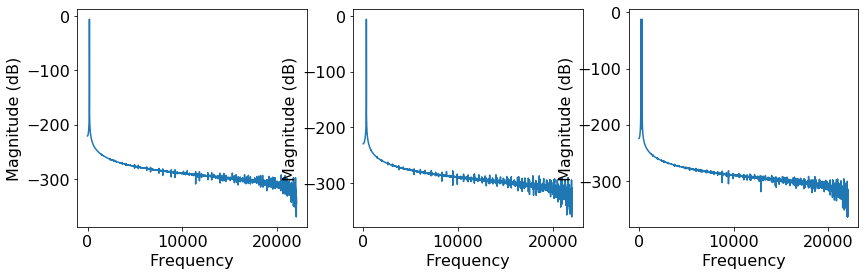

In [96]:
multiplot(ptones, fs)

## 3. Limiting before mixing

In [97]:
ltones = [ softClipping(t) for t in tones ]
ltones.append(0.5 * (ltones[0] + ltones[1]))
multiplay(ltones, fs)

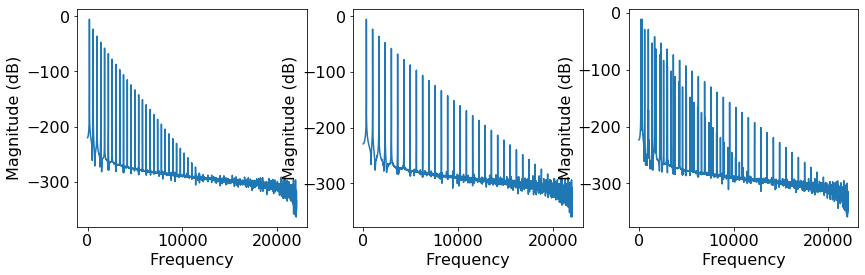

In [98]:
multiplot(ltones, fs)

## 4. Mixing before limiting

Notice the strong intermodulation distortion

In [104]:
itones = [ tones[0], tones[1], softClipping(0.5 * (tones[0] + tones[1])) ]
multiplay(itones, fs)

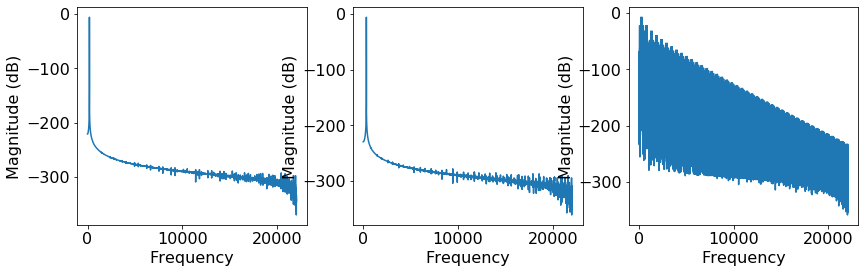

In [103]:
multiplot(itones, fs)